In [ ]:
#importing required modules
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


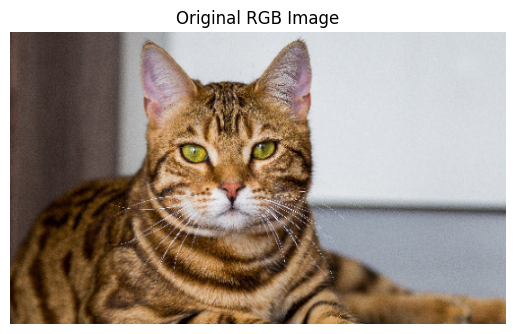

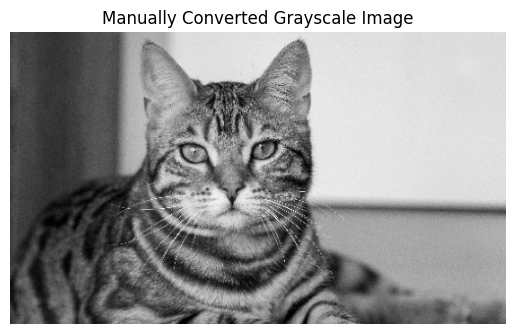

Pixel intensity range: min=0.002866666836198419, max=1.0056352955698966
Using threshold value: 0.5042509812030476


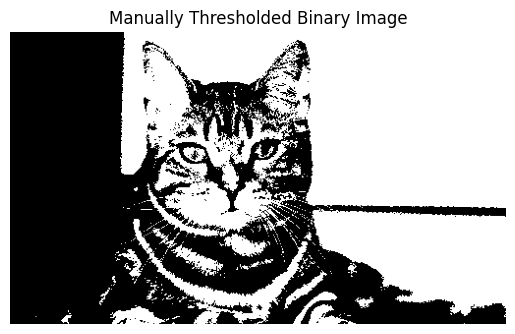

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Function to manually convert RGB to Grayscale
def rgb_to_gray_manual(rgb):
    # Grayscale formula: Gray = 0.299R + 0.587G + 0.144B
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.144])

# Function to manually apply binary thresholding
def manual_threshold(gray_image, threshold):
    # Pixels above threshold are set to 255 (white), below to 0 (black)
    return np.where(gray_image > threshold, 255, 0)

# Load the RGB image
img_rgb = mpimg.imread('/content/drive/MyDrive/CATTO.png')  # Update with your file path

# Display the original RGB image
plt.imshow(img_rgb)
plt.title("Original RGB Image")
plt.axis('off')
plt.show()

# Convert RGB to grayscale
img_gray = rgb_to_gray_manual(img_rgb)

# Display the manually converted grayscale image
plt.imshow(img_gray, cmap='gray')
plt.title("Manually Converted Grayscale Image")
plt.axis('off')
plt.show()

# Debug: Check the intensity range of the grayscale image
print(f"Pixel intensity range: min={img_gray.min()}, max={img_gray.max()}")

# Set an appropriate threshold value (adjust based on intensity range)
threshold_value = (img_gray.min() + img_gray.max()) / 2  # Midpoint of range
print(f"Using threshold value: {threshold_value}")

# Apply manual binary thresholding
img_binary = manual_threshold(img_gray, threshold_value)

# Display the manually thresholded binary image
plt.imshow(img_binary, cmap='gray')
plt.title("Manually Thresholded Binary Image")
plt.axis('off')
plt.show()


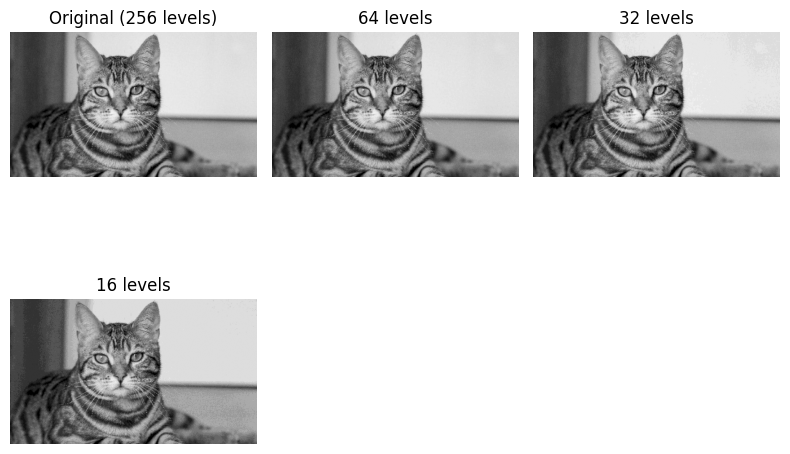

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Load your grayscale image (replace this with your actual image loading code)
gray_image = cv2.imread('/content/drive/MyDrive/CATTO.png', cv2.IMREAD_GRAYSCALE) # Added file extension, assuming it is a jpg

if gray_image is None:
    print("Error: Could not read the image. Please check the file path.")
else:
    # Define quantization levels
    quant_levels = [64, 32, 16]

    # Normalize the image
    normalized_image = gray_image / 255.0

    # Initialize a list to store quantized images
    quantized_images = []

    # Quantize the image to each specified level
    for levels in quant_levels:
        # Quantize
        quantized_image = np.round(normalized_image * (levels - 1)) / (levels - 1)
        # Denormalize
        quantized_image = np.uint8(quantized_image * 255)
        # Append to list
        quantized_images.append(quantized_image)

    # Display the original image
    plt.figure(figsize=(8, 6))
    plt.subplot(2, 3, 1)
    plt.imshow(gray_image, cmap='gray')
    plt.title('Original (256 levels)')
    plt.axis('off')

    # Display the quantized images
    for i, levels in enumerate(quant_levels):
        plt.subplot(2, 3, i + 2)
        plt.imshow(quantized_images[i], cmap='gray')
        plt.title(f'{levels} levels')
        plt.axis('off')

    plt.tight_layout()
    plt.show()